<a href="https://colab.research.google.com/github/alisonsoong/NASA-SEES-Internship-2021/blob/main/CurrentWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://nbviewer.jupyter.org/github/giswqs/geemap/blob/master/examples/notebooks/geemap_and_earthengine.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_parent"  href="https://colab.research.google.com/github/giswqs/geemap/blob/master/examples/notebooks/geemap_and_earthengine.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# Night Light and Population Grid datasets

Example of VIIRS (2012-present, monthly) and DMSP (1992-2014, yearly) night light datasets + Population Grid dataset

— Alison

In [46]:
import ee # Import Earth Engine API

In [48]:
## Trigger the authentication flow. You only need to do this once
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=9gmdD6KVpdX5emcabu5BkklJrXkNC684wpqeur8TcRU&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWhg8HL1TyUifyQwfdmeHYFstjRikhg4kE_iSasK07WNpIrwSC2MzKQ

Successfully saved authorization token.


In [ ]:
# Installs geemap package
import subprocess

try:
    import geemap
    print("geemap is imported and ready to use in Colab")
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])
    import geemap
    print("geemap is now installed, imported and ready to use in Colab") 


In [ ]:
# VIIRS
collectionNight2019  = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG') \
    .filter(ee.Filter.date('2019-01-01', '2019-12-31'))

collectionNight2020  = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG') \
    .filter(ee.Filter.date('2020-01-01', '2020-12-31'))

night_light_params = {
    'bands': ['avg_rad'],
    'min': 0, 
    'max': 30,
}

imageNight2019 = collectionNight2019.mean()
imageNight2020 = collectionNight2020.mean()

In [ ]:
# DMSP
collectionDMSP1992 = ee.ImageCollection("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS") \
    .filter(ee.Filter.date('1992-01-01', '1992-12-31'))

collectionDMSP2013 = ee.ImageCollection("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS") \
    .filter(ee.Filter.date('2013-01-01', '2013-12-31'))

imageDMSP1992 = collectionDMSP1992.select('stable_lights')
imageDMSP2013 = collectionDMSP2013.select('stable_lights')

dmsp_params = {
  'min': 0.0,
  'max': 63.0,
}

In [ ]:
# population grid
dataset2020 = ee.ImageCollection("WorldPop/GP/100m/pop_age_sex_cons_unadj")\
    .filterDate("2020-01-01", "2020-12-01")

pop_params = {
  'bands': ['population'],
  'min': 0.0,
  'max': 50.0,
  'palette': ['24126c', '1fff4f', 'd4ff50']
}

In [ ]:
roi = ee.Geometry.Point(-122.438005, 37.729844) # (long, lat)

Map = geemap.Map()
Map.addLayer(imageNight2019, night_light_params, "VIIRS Night image: 2019", False)
Map.addLayer(imageNight2020, night_light_params, "VIIRS Night image: 2020", False)
Map.addLayer(imageDMSP1992, dmsp_params, "DMSP Night image: 1992", False)
Map.addLayer(imageDMSP2013, dmsp_params, "DMSP Night image: 2013")
Map.addLayer(dataset2020, pop_params, "Population 2020", False);
Map.centerObject(roi, 6)
Map


# Using Pandas and Seaborn to create graphs of change in data over time

In [20]:
try:
    import geemap
    import ee
    import seaborn as sns
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap seaborn matplotlib
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
        !conda install seaborn matplotlib -y
    import geemap
    import ee
    import seaborn as sns
    import matplotlib.pyplot as plt

In [21]:
import json
import pandas as pd
import geemap
import ee
import seaborn as sns
import matplotlib.pyplot as plt

try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

In [51]:
# identify a 500 meter buffer around our Point Of Interest (POI)
poi = ee.Geometry.Point(120.936452, 23.766943).buffer(90000)

viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate('2014-01-01','2021-07-01')

# get Taiwan county boundary geometry
taiwanarea = ee.Feature(ee.FeatureCollection("FAO/GAUL/2015/level0").filter(ee.Filter.eq('ADM0_NAME', 'Taiwan')).first()).geometry()

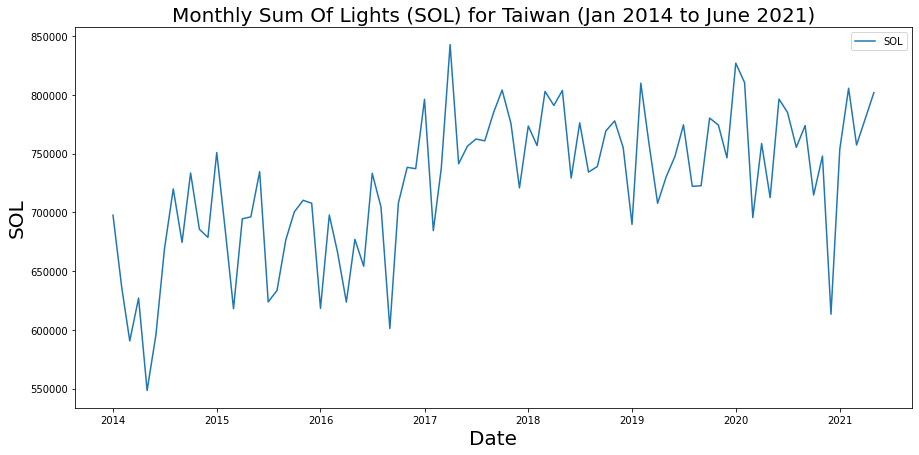

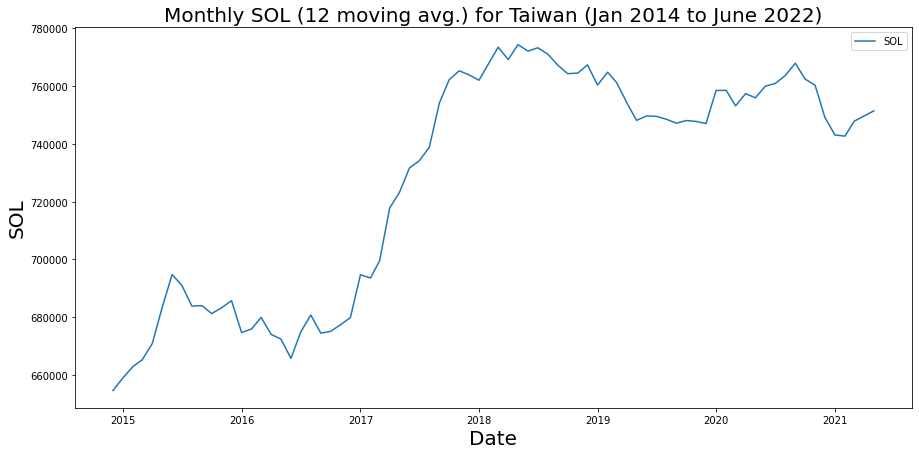

In [45]:
# revise our reducer function to be to get SOL for Taiwan
def get_taiwan_sol(img):
    sol = img.reduceRegion(reducer=ee.Reducer.sum(), geometry=taiwanarea, scale=500, maxPixels=1e9).get('avg_rad')
    return img.set('date', img.date().format()).set('SOL',sol)

# reduce collection
taiwan_sol = viirs.map(get_taiwan_sol)

# get lists
nested_list = taiwan_sol.reduceColumns(ee.Reducer.toList(2), ['date','SOL']).values().get(0)

# convert to dataframe
soldf = pd.DataFrame(nested_list.getInfo(), columns=['date','SOL'])
soldf['date'] = pd.to_datetime(soldf['date'])
soldf = soldf.set_index('date')

fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=soldf, ax=ax)
ax.set_ylabel('SOL',fontsize=20)
ax.set_xlabel('Date',fontsize=20)
ax.set_title('Monthly Sum Of Lights (SOL) for Taiwan (Jan 2014 to June 2021)',fontsize=20);

fig, ax = plt.subplots(figsize=(15,7))
window=12
sns.lineplot(data=soldf.rolling(window).mean(), ax=ax)
ax.set_ylabel('SOL',fontsize=20)
ax.set_xlabel('Date',fontsize=20)
ax.set_title(f'Monthly SOL ({window} moving avg.) for Taiwan (Jan 2014 to June 2022)',fontsize=20);

In [91]:
# VIIRS
collectionNight2019  = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG') \
    .filter(ee.Filter.date('2019-01-01', '2019-12-31'))

collectionNight2020  = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG') \
    .filter(ee.Filter.date('2020-01-01', '2020-12-31'))

aoi_Taiwan = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Taiwan'))
viirs2019 = collectionNight2019.select('avg_rad').median().clip(aoi_Taiwan)
viirs2020 = collectionNight2020.select('avg_rad').median().clip(aoi_Taiwan)

night_light_params = {
    'bands': ['avg_rad'],
    'min': 0, 
    'max': 30,
}

imageNight2019 = collectionNight2019.mean()
imageNight2020 = collectionNight2020.mean()
taiwanMap = geemap.Map()
taiwanMap.centerObject(poi, zoom=7)
taiwanMap.add_basemap("SATELLITE")
# taiwanMap.addLayer(imageNight2019, night_light_params, "VIIRS Night image: 2019", False)
# taiwanMap.addLayer(imageNight2020, night_light_params, "VIIRS Night image: 2020", False)
taiwanMap.addLayer(taiwanarea, {}, "Taiwan")
taiwanMap.addLayer(viirs2019, night_light_params, "VIIRS-DNB- Taiwan Dec 2019")
taiwanMap.addLayer(viirs2020, night_light_params, "VIIRS-DNB- Taiwan Dec 2020")
taiwanMap.addLayerControl()
taiwanMap